In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [13]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('weather.csv')
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [3]:
df.shape

(366, 22)

In [4]:
df.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [5]:
df.dropna(axis = 0, inplace = True)

In [6]:
df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 328 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        328 non-null    float64
 1   MaxTemp        328 non-null    float64
 2   Rainfall       328 non-null    float64
 3   Evaporation    328 non-null    float64
 4   Sunshine       328 non-null    float64
 5   WindGustDir    328 non-null    object 
 6   WindGustSpeed  328 non-null    float64
 7   WindDir9am     328 non-null    object 
 8   WindDir3pm     328 non-null    object 
 9   WindSpeed9am   328 non-null    float64
 10  WindSpeed3pm   328 non-null    int64  
 11  Humidity9am    328 non-null    int64  
 12  Humidity3pm    328 non-null    int64  
 13  Pressure9am    328 non-null    float64
 14  Pressure3pm    328 non-null    float64
 15  Cloud9am       328 non-null    int64  
 16  Cloud3pm       328 non-null    int64  
 17  Temp9am        328 non-null    float64
 18  Temp3pm        

In [8]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,7.742988,20.897561,1.440854,4.702439,8.014939,40.396341,10.414634,18.185976,71.100610,44.003049,1019.350000,1016.530793,3.905488,4.000000,12.815549,19.556402,1.422561
std,5.945199,6.707310,4.289427,2.681183,3.506646,13.132176,7.811544,8.926759,12.983367,16.605975,6.715244,6.469774,2.974957,2.652101,5.542521,6.644311,4.234023
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,2.000000,4.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.850000,15.500000,0.000000,2.550000,6.000000,31.000000,6.000000,11.000000,63.000000,32.000000,1014.800000,1012.400000,1.000000,1.000000,8.175000,14.500000,0.000000
50%,7.900000,20.400000,0.000000,4.400000,8.750000,39.000000,7.000000,17.000000,71.000000,42.500000,1019.750000,1016.900000,4.000000,4.000000,13.500000,18.850000,0.000000
75%,12.800000,25.800000,0.200000,6.600000,10.700000,46.000000,13.000000,24.000000,80.000000,54.000000,1024.300000,1021.125000,7.000000,7.000000,17.200000,24.225000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,93.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [9]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [10]:
df.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm       int64
Humidity9am        int64
Humidity3pm        int64
Pressure9am      float64
Pressure3pm      float64
Cloud9am           int64
Cloud3pm           int64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [11]:
df.nunique()

MinTemp          170
MaxTemp          175
Rainfall          44
Evaporation       55
Sunshine         112
WindGustDir       16
WindGustSpeed     35
WindDir9am        16
WindDir3pm        16
WindSpeed9am      21
WindSpeed3pm      24
Humidity9am       60
Humidity3pm       71
Pressure9am      183
Pressure3pm      184
Cloud9am           9
Cloud3pm           9
Temp9am          168
Temp3pm          190
RainToday          2
RISK_MM           44
RainTomorrow       2
dtype: int64

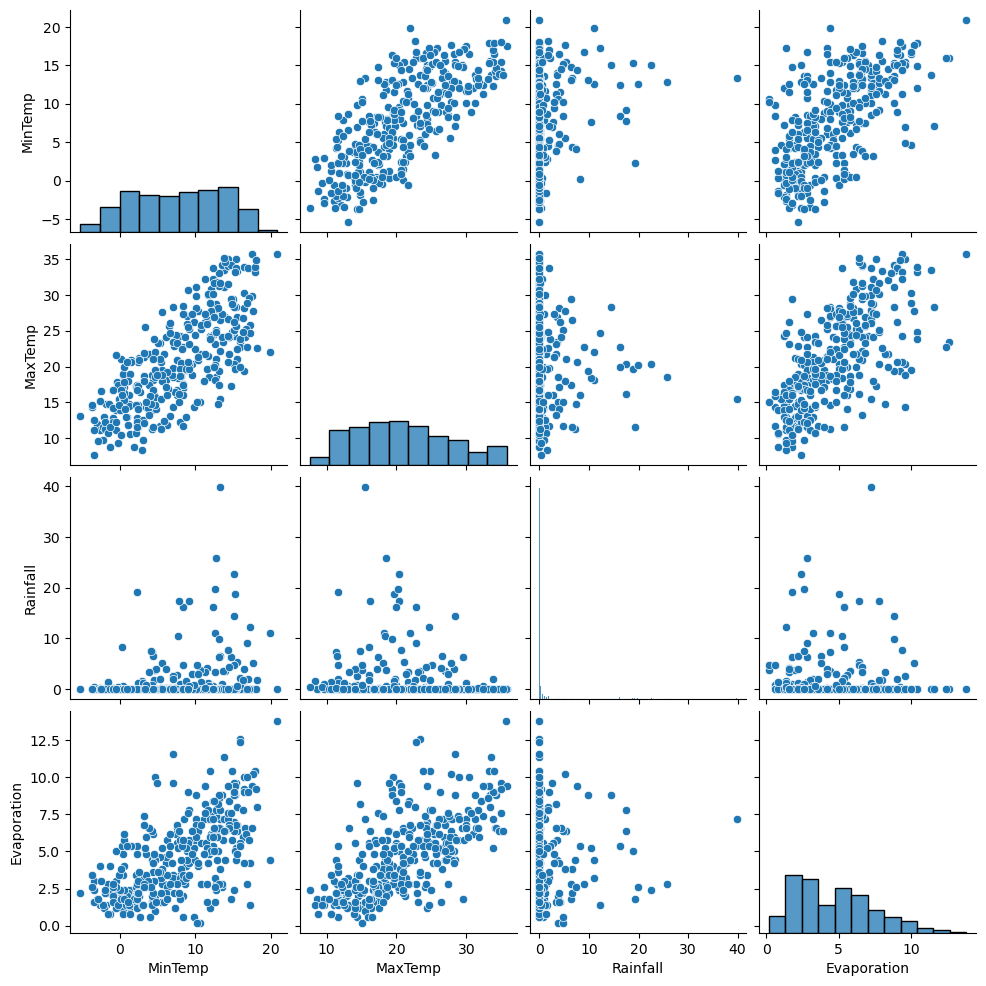

In [14]:
sns.pairplot(df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation']])
plt.show()

In [15]:
avg_max_temp = statistics.mean(df['MaxTemp'])
print("Average Maximum Temperature is ",+avg_max_temp)
avg_min_temp = statistics.mean(df['MinTemp'])
print("Average Minimum Temperature is ",+avg_max_temp)
avg_Rainfall = statistics.mean(df['Rainfall'])
print("Average Rainfall is ",+avg_Rainfall)
avg_evaporation = statistics.mean(df['Evaporation'])
print("Average Evaporation is ",+avg_evaporation)

Average Maximum Temperature is  20.897560975609757
Average Minimum Temperature is  20.897560975609757
Average Rainfall is  1.4408536585365854
Average Evaporation is  4.702439024390244


In [16]:
df['RainToday'].value_counts()

RainToday
No     267
Yes     61
Name: count, dtype: int64

In [17]:
df['RainToday'] = df['RainToday'].map({'Yes' : 1,'No' : 0})

In [18]:
df['RainToday'].value_counts()

RainToday
0    267
1     61
Name: count, dtype: int64

In [19]:
df['RainTomorrow'].value_counts()

RainTomorrow
No     268
Yes     60
Name: count, dtype: int64

In [20]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes' : 1,'No' : 0})

In [21]:
df['RainTomorrow'].value_counts()

RainTomorrow
0    268
1     60
Name: count, dtype: int64

In [22]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6,1
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6,1
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8,1
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,1,2.8,1
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,1,0.0,0


In [23]:
categorical_df = df.select_dtypes(include = ['object'])
weather_dummies_df = pd.get_dummies(categorical_df, dtype = int, drop_first = True)
weather_dummies_df.head()

,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Now, let's drop the original categorial columns 
df.drop(list(categorical_df.columns), axis = 1, inplace = True)

In [25]:
#merge original and dummies
df = pd.concat([df, weather_dummies_df], axis = 1)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20,68,29,...,0,1,0,0,0,0,0,0,0,0
1,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17,80,36,...,0,0,0,0,0,0,0,1,0,0
2,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6,82,69,...,0,0,0,0,0,0,0,0,0,0
3,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24,62,56,...,0,0,0,0,0,0,0,1,0,0
4,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28,68,49,...,0,0,0,0,0,0,0,0,0,0


In [26]:
corr_coeff = df.corr()

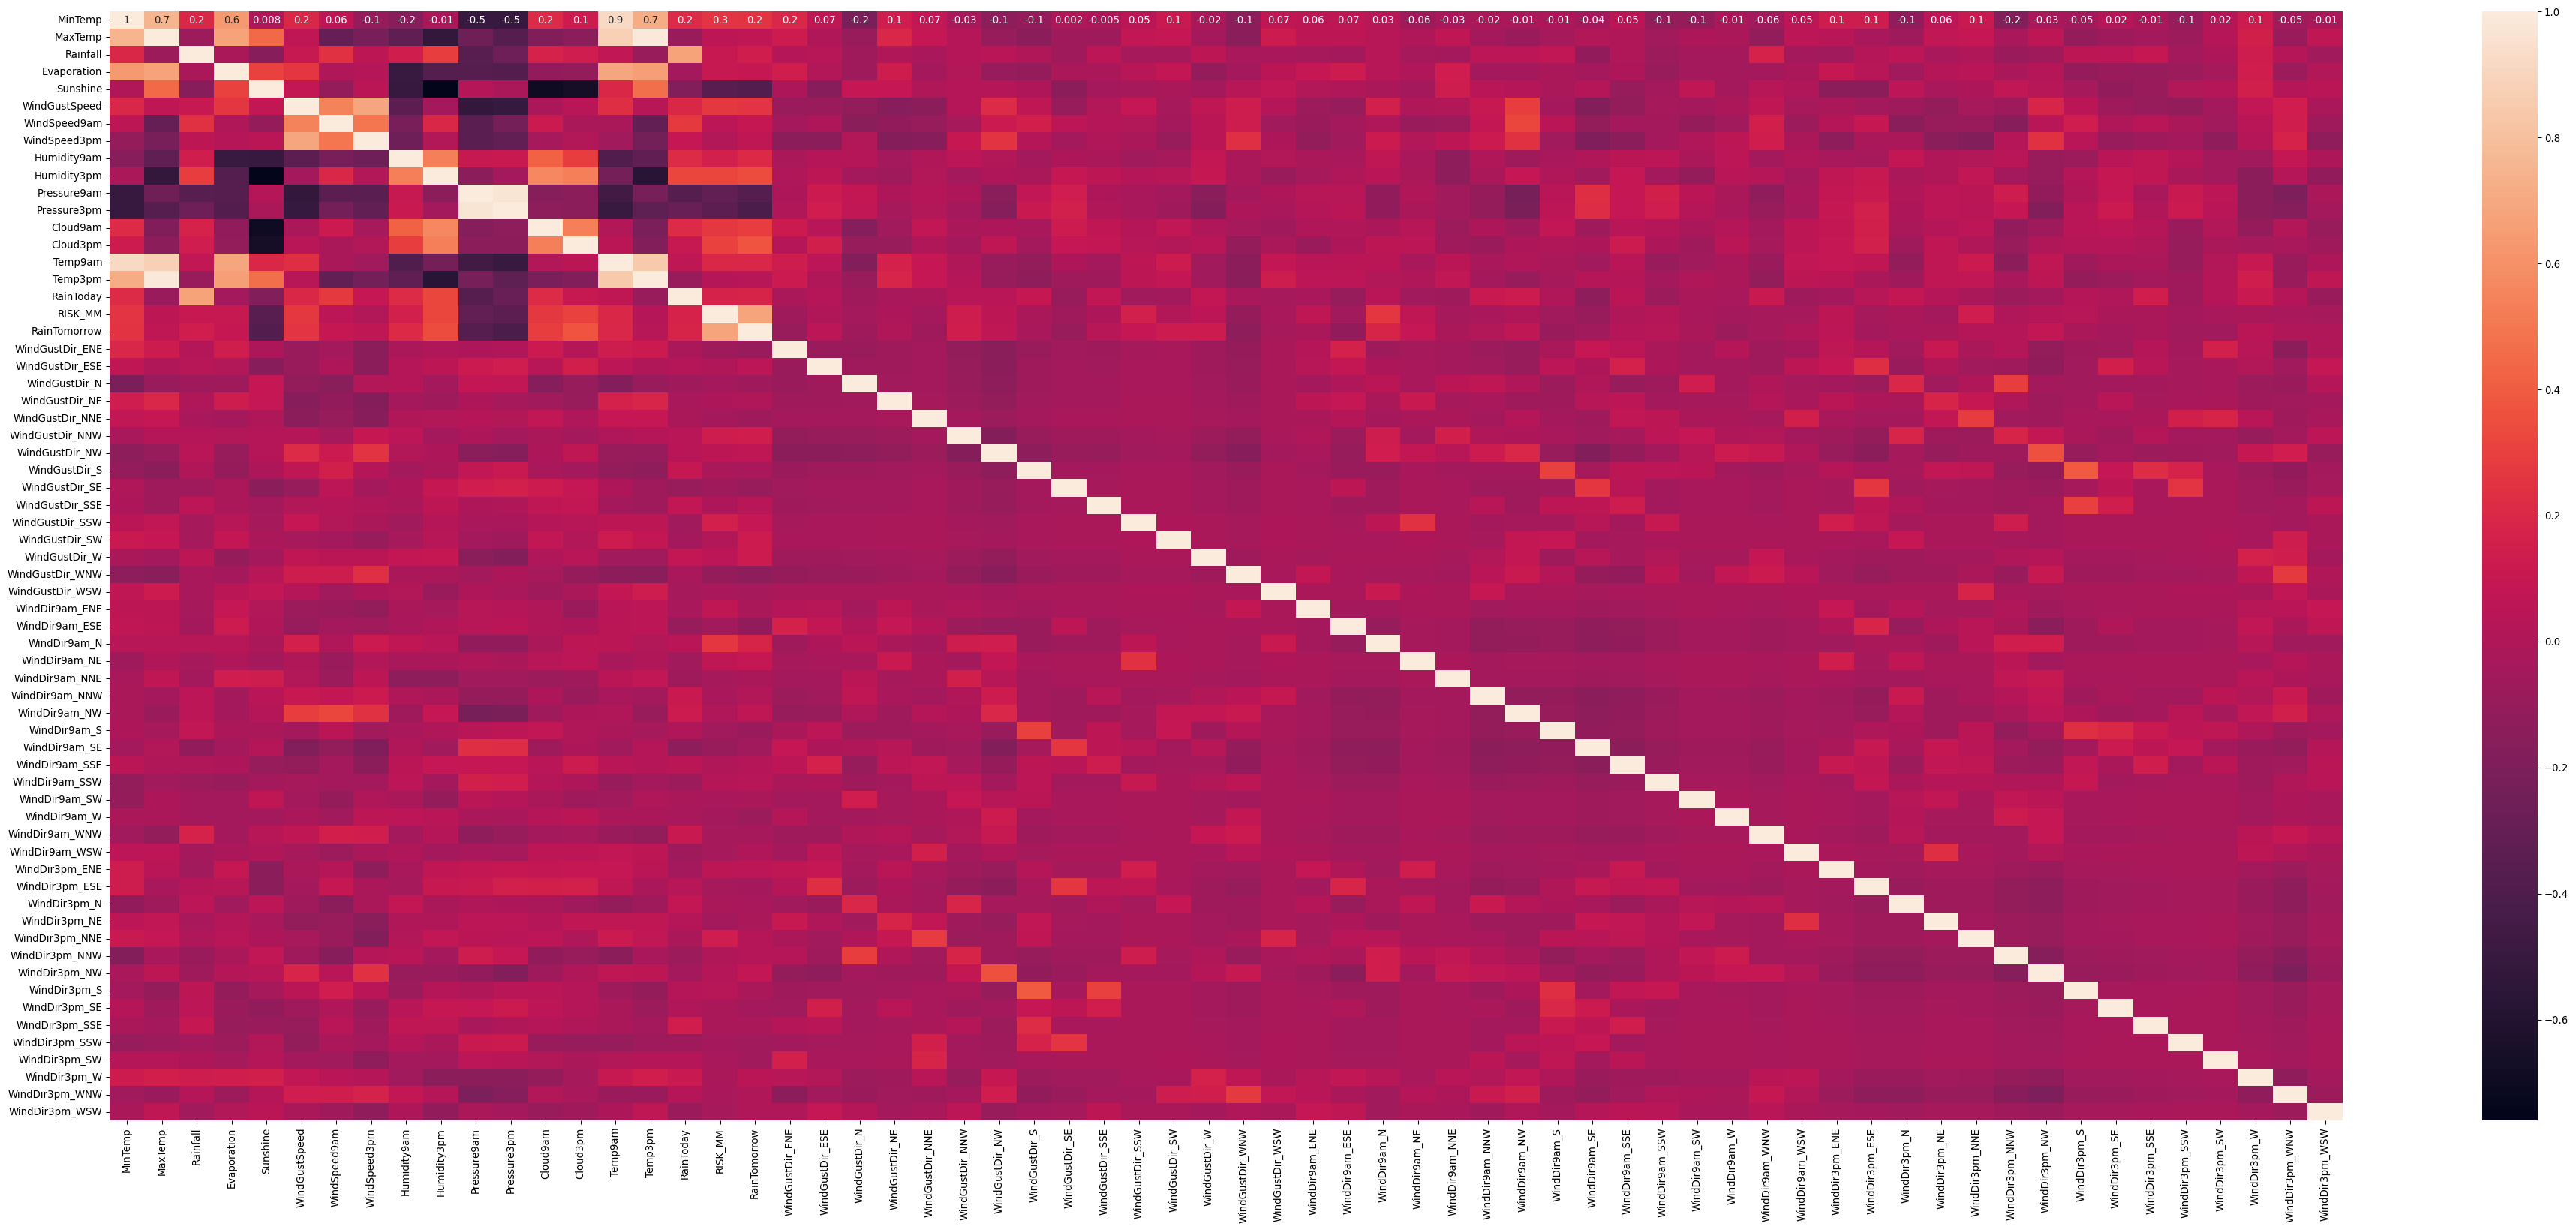

In [27]:
# Use heatmap to observe correlations.
plt.figure(figsize = (50, 20), dpi = 96)
sns.heatmap(corr_coeff, annot = True, fmt='.1g')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
features = list(df.columns)
features.remove('RainTomorrow')
x = df[features]
y = df['RainTomorrow']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [29]:
def std_scaler(series):
  if (series.std() != 0):
    new_series = (series - series.mean()) / series.std()
    return new_series
  return series

In [30]:
norm_x_train = x_train.apply(std_scaler, axis = 0)
norm_x_test = x_test.apply(std_scaler, axis = 0)

In [31]:
norm_x_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
count,2.290000e+02,2.290000e+02,2.290000e+02,2.290000e+02,2.290000e+02,2.290000e+02,2.290000e+02,2.290000e+02,2.290000e+02,2.290000e+02,...,2.290000e+02,2.290000e+02,2.290000e+02,2.290000e+02,2.290000e+02,2.290000e+02,229.000000,2.290000e+02,2.290000e+02,2.290000e+02
mean,1.241123e-16,4.033649e-16,2.811919e-17,-1.241123e-16,-2.327105e-17,2.191357e-16,-1.939254e-18,-8.532718e-17,-2.171965e-16,1.939254e-16,...,3.878508e-17,-4.654210e-17,6.205613e-17,7.757017e-17,2.254383e-17,-3.878508e-18,0.000000,1.939254e-17,-8.338793e-17,-7.320685e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.905557e+00,-1.936475e+00,-3.504873e-01,-1.510115e+00,-2.282556e+00,-2.047593e+00,-1.045622e+00,-1.539321e+00,-2.673932e+00,-1.883588e+00,...,-3.648009e-01,-4.520695e-01,-2.018179e-01,-1.898447e-01,-1.330419e-01,-1.330419e-01,-0.114962,-2.734764e-01,-4.728828e-01,-2.132198e-01
25%,-8.660159e-01,-8.769208e-01,-3.504873e-01,-8.406493e-01,-5.834036e-01,-6.727473e-01,-5.516611e-01,-7.547323e-01,-6.310651e-01,-7.370447e-01,...,-3.648009e-01,-4.520695e-01,-2.018179e-01,-1.898447e-01,-1.330419e-01,-1.330419e-01,-0.114962,-2.734764e-01,-4.728828e-01,-2.132198e-01
50%,-1.090940e-02,-1.264036e-01,-3.504873e-01,-1.711832e-01,1.941744e-01,-6.170464e-02,-4.281710e-01,-8.222764e-02,-2.577124e-02,-7.325650e-02,...,-3.648009e-01,-4.520695e-01,-2.018179e-01,-1.898447e-01,-1.330419e-01,-1.330419e-01,-0.114962,-2.734764e-01,-4.728828e-01,-2.132198e-01
75%,8.441971e-01,6.976938e-01,-2.895908e-01,7.214383e-01,7.701581e-01,4.729577e-01,3.127698e-01,7.023611e-01,6.551843e-01,6.508761e-01,...,-3.648009e-01,-4.520695e-01,-2.018179e-01,-1.898447e-01,-1.330419e-01,-1.330419e-01,-0.114962,-2.734764e-01,-4.728828e-01,-2.132198e-01
max,2.219074e+00,2.213444e+00,5.678266e+00,3.399303e+00,1.634134e+00,4.444735e+00,3.770493e+00,3.840716e+00,2.092757e+00,2.642241e+00,...,2.729251e+00,2.202390e+00,4.933325e+00,5.244461e+00,7.483607e+00,7.483607e+00,8.660506,3.640655e+00,2.105454e+00,4.669515e+00


In [32]:
norm_x_test.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
count,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,...,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,99.0
mean,7.850062e-18,-8.578996e-17,-4.373606e-17,1.020508e-16,1.054151e-16,-1.570012e-17,6.728624e-17,2.915737e-17,-1.161389e-16,-1.345725e-17,...,4.485750e-18,-1.570012e-17,-3.083953e-17,-2.971809e-17,-5.551115e-17,5.887546e-18,6.448265e-18,-6.504337e-17,3.252168e-17,0.0
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0
min,-2.230886e+00,-1.919440e+00,-3.535830e-01,-1.719787e+00,-2.287396e+00,-2.028714e+00,-1.160951e+00,-1.712482e+00,-2.608920e+00,-1.701420e+00,...,-3.695102e-01,-4.368340e-01,-2.041567e-01,-1.758816e-01,-1.758816e-01,-1.005038e-01,-1.005038e-01,-2.949985e-01,-3.517632e-01,0.0
25%,-8.052899e-01,-6.851158e-01,-3.535830e-01,-8.225069e-01,-4.928061e-01,-8.156210e-01,-6.009797e-01,-9.255123e-01,-6.048612e-01,-7.169106e-01,...,-3.695102e-01,-4.368340e-01,-2.041567e-01,-1.758816e-01,-1.758816e-01,-1.005038e-01,-1.005038e-01,-2.949985e-01,-3.517632e-01,0.0
50%,6.356431e-02,-9.478714e-02,-3.535830e-01,-7.477335e-02,1.888598e-01,-5.743810e-02,-4.609868e-01,-2.611875e-02,-4.372491e-02,-9.040487e-02,...,-3.695102e-01,-4.368340e-01,-2.041567e-01,-1.758816e-01,-1.758816e-01,-1.005038e-01,-1.005038e-01,-2.949985e-01,-3.517632e-01,0.0
75%,8.311928e-01,7.638728e-01,-3.033370e-01,5.981868e-01,8.009681e-01,4.732900e-01,6.589566e-01,6.484264e-01,7.178173e-01,5.361009e-01,...,-3.695102e-01,-4.368340e-01,-2.041567e-01,-1.758816e-01,-1.758816e-01,-1.005038e-01,-1.005038e-01,-2.949985e-01,-3.517632e-01,0.0
max,1.700047e+00,2.143862e+00,6.312387e+00,2.916161e+00,1.496546e+00,3.126930e+00,2.898843e+00,3.459031e+00,2.280983e+00,2.952623e+00,...,2.678949e+00,2.266076e+00,4.848722e+00,5.628212e+00,5.628212e+00,9.849371e+00,9.849371e+00,3.355607e+00,2.814106e+00,0.0


In [33]:
log_clf = LogisticRegression()
log_clf.fit(norm_x_train, y_train)
log_clf.score(norm_x_train, y_train)

0.9912663755458515

In [34]:
log_clf_trainpred = log_clf.predict(norm_x_train)
log_clf_trainpred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_train, log_clf_trainpred)

array([[187,   0],
       [  2,  40]], dtype=int64)

In [36]:
print(classification_report(y_train, log_clf_trainpred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       187
           1       1.00      0.95      0.98        42

    accuracy                           0.99       229
   macro avg       0.99      0.98      0.99       229
weighted avg       0.99      0.99      0.99       229



In [37]:
log_clf_testpred = log_clf.predict(norm_x_test)
log_clf_testpred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [38]:
confusion_matrix(y_test, log_clf_testpred)

array([[81,  0],
       [ 5, 13]], dtype=int64)

In [39]:
print(classification_report(y_test, log_clf_testpred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        81
           1       1.00      0.72      0.84        18

    accuracy                           0.95        99
   macro avg       0.97      0.86      0.90        99
weighted avg       0.95      0.95      0.95        99



In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,log_clf_testpred)

0.9494949494949495